In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [58]:
train_dataset = torchvision.datasets.MNIST(root='../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=False)
test_dataset = torchvision.datasets.MNIST(root='../data', train=False, transform=transforms.ToTensor(), download=False)

In [59]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                 batch_size=10000,
                                 shuffle=True,
                                 num_workers=2)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, shuffle=False)

In [60]:
X_list, y_list = [], []
for i, (X, y) in enumerate(train_loader):
    print(i)
    X_list.append(X)
    y_list.append(y)
print('len:', len(X_list), len(y_list))

0
1
2
3
4
5
len: 6 6


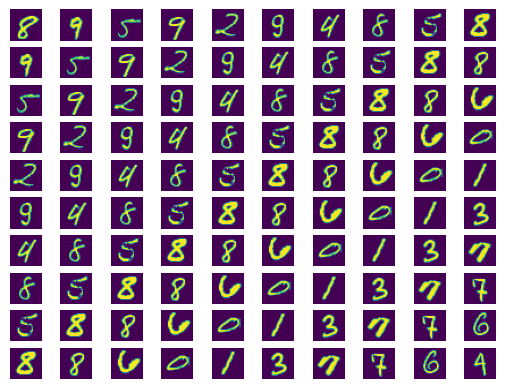

In [61]:
x_size, y_size = 10, 10
fig, ax = plt.subplots(x_size, y_size)
for i in range(x_size):
    for j in range(y_size):
        ax[i][j].imshow(X[i + j][0])
        ax[i][j].axis('off')

In [62]:
from model import CNN

model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [63]:
def train(train_loader):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss = running_loss / len(train_loader)
    return train_loss

def valid(test_loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            predicted = outputs.max(1, keepdim=True)[1]
            labels = labels.view_as(predicted)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    val_loss = running_loss / len(test_loader)
    val_acc = correct / total

    return val_loss, val_acc



In [64]:
epochs = 10

In [65]:
loss_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(epochs):
    loss = train(train_loader)
    val_loss, val_acc = valid(test_loader)
    print(f'{epoch=}, {val_loss=}, {val_acc=}')
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)


np.save('loss_list.npy', np.array(loss_list))
np.save('val_loss_list.npy', np.array(val_loss_list))
np.save('val_acc_list.npy', np.array(val_acc_list))
torch.save(model.state_dict(), 'cnn.pkl')

epoch=0, val_loss=0.6733414775914073, val_acc=0.7691
epoch=1, val_loss=0.3553291804598292, val_acc=0.8964
epoch=2, val_loss=0.2424918328469601, val_acc=0.9347
epoch=3, val_loss=0.17574502683662302, val_acc=0.9481
epoch=4, val_loss=0.13349564369311745, val_acc=0.9575
epoch=5, val_loss=0.10426407274805642, val_acc=0.9664
epoch=6, val_loss=0.08131577370098016, val_acc=0.9732
epoch=7, val_loss=0.06668859810422433, val_acc=0.9798
epoch=8, val_loss=0.055953964845719795, val_acc=0.9814
epoch=9, val_loss=0.050097834889589715, val_acc=0.984


正解率： 98.4 %


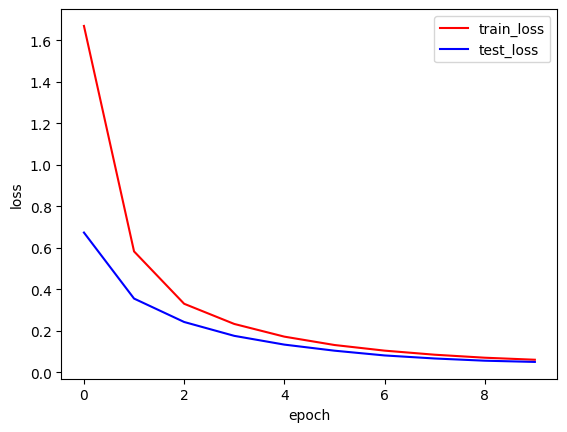

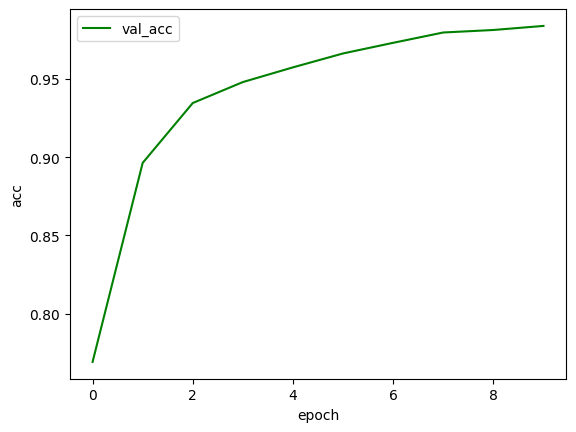

In [66]:
plt.plot(range(epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(epochs), val_loss_list, 'b-', label='test_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.figure()
plt.plot(range(epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
print('正解率：',val_acc_list[-1]*100, '%')